<a href="https://colab.research.google.com/github/AlexeyProvorov/chest-x-ray-diagnosis/blob/main/NN_chest_xray_pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Just an example of a neural network from scratch for recognizing chest X-ray images. Binary classification.

In [ ]:
import  tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/chest_xray.zip"





In [ ]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  1


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"leoprovorov","key":"febb590f48686589e6793b52e31c4140"}'}

In [ ]:
%%capture
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json
!pip install kaggle

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia


Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
 99% 2.28G/2.29G [00:17<00:00, 153MB/s]
100% 2.29G/2.29G [00:17<00:00, 140MB/s]


In [ ]:
%%capture
!unzip chest-xray-pneumonia.zip -d chest_xray


In [ ]:
data_dir = 'chest_xray/chest_xray'

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal'),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir + '/train',
    image_size = (256, 256),
    batch_size = 32
)

Found 5216 files belonging to 2 classes.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir + '/val',
    image_size=(256, 256),
    batch_size=32
)

Found 16 files belonging to 2 classes.


In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir + '/test',
    image_size=(256, 256),
    batch_size=32
)

Found 624 files belonging to 2 classes.


In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
normalized_train_ds = train_ds.map(lambda x, y : (normalization_layer(x), y))
normalized_val_ds = val_ds.map(lambda x, y : (normalization_layer(x), y))
normalized_test_ds = test_ds.map(lambda x, y : (normalization_layer(x), y))



In [ ]:
model = models.Sequential([
    data_augmentation,
    layers.Conv2D(32, (3,3), kernel_initializer=tf.keras.initializers.HeNormal(),input_shape = (256, 256,3)),
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=0.01),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), kernel_initializer=tf.keras.initializers.HeNormal()),layers.BatchNormalization(),layers.LeakyReLU(alpha=0.01),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    layers.Conv2D(32, (3,3), kernel_initializer=tf.keras.initializers.HeNormal()),layers.BatchNormalization(),layers.LeakyReLU(alpha=0.01),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, kernel_initializer=tf.keras.initializers.HeNormal()),layers.BatchNormalization(),layers.LeakyReLU(alpha=0.01),
    layers.Dense(1, activation = 'sigmoid')
]
)

In [ ]:
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(normalized_train_ds,
                    validation_data = normalized_val_ds,
                    epochs = 20)

Epoch 1/20
163/163 [==============================] - 56s 268ms/step - loss: 0.2041 - accuracy: 0.9214 - val_loss: 4.1509 - val_accuracy: 0.5000
Epoch 2/20
163/163 [==============================] - 46s 271ms/step - loss: 0.1377 - accuracy: 0.9490 - val_loss: 3.2935 - val_accuracy: 0.5000
Epoch 3/20
163/163 [==============================] - 42s 249ms/step - loss: 0.1173 - accuracy: 0.9549 - val_loss: 3.4382 - val_accuracy: 0.5000
Epoch 4/20
163/163 [==============================] - 44s 249ms/step - loss: 0.1233 - accuracy: 0.9544 - val_loss: 0.8348 - val_accuracy: 0.5625
Epoch 5/20
163/163 [==============================] - 42s 250ms/step - loss: 0.1100 - accuracy: 0.9578 - val_loss: 1.4685 - val_accuracy: 0.4375
Epoch 6/20
163/163 [==============================] - 42s 248ms/step - loss: 0.1006 - accuracy: 0.9599 - val_loss: 1.7202 - val_accuracy: 0.5000
Epoch 7/20
163/163 [==============================] - 42s 248ms/step - loss: 0.1019 - accuracy: 0.9622 - val_loss: 1.4372 - val_ac

In [ ]:
test_loss , test_acc = model.evaluate(normalized_test_ds, verbose = 2)
print(f'\nТестовая точность: {test_acc}')


20/20 - 4s - loss: 0.5604 - accuracy: 0.7676 - 4s/epoch - 184ms/step

Тестовая точность: 0.7676281929016113


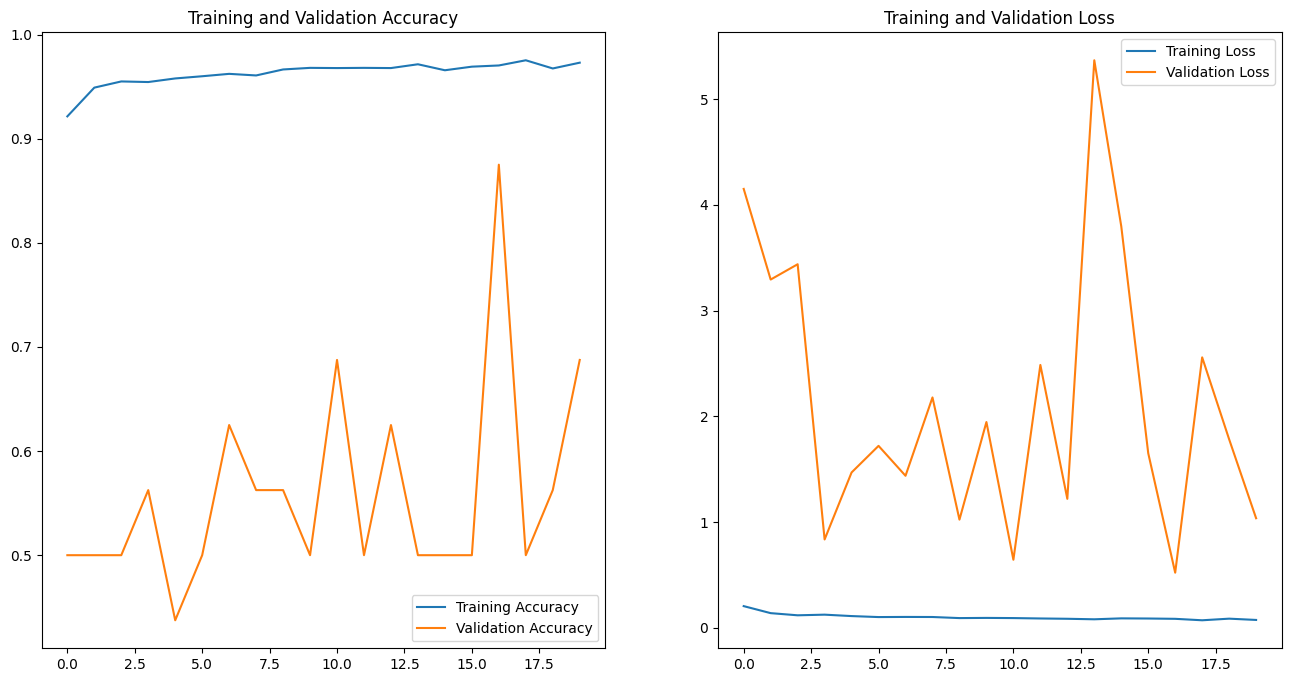

In [ ]:
# График точности и потерь обучения
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

20/20 [==============================] - 8s 241ms/step


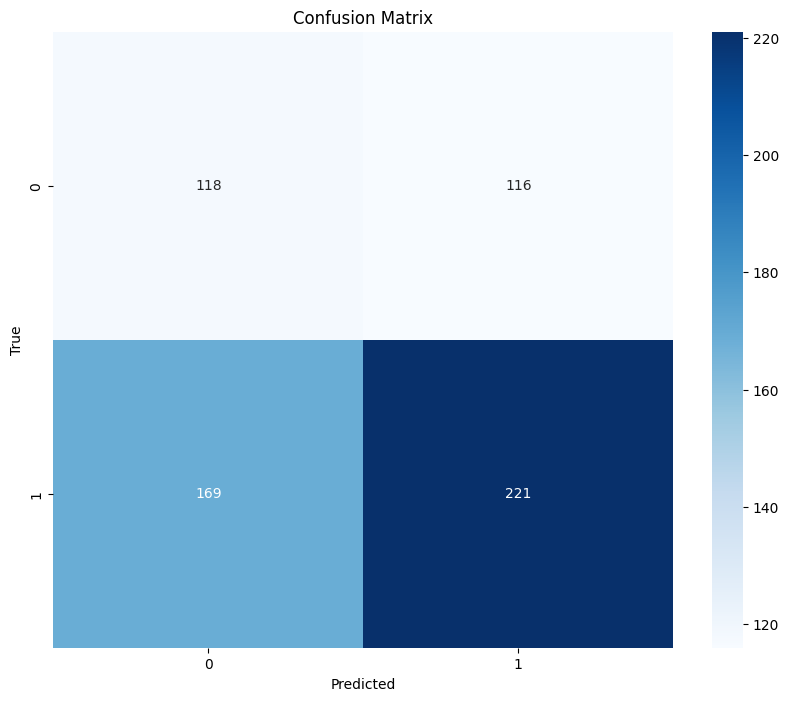

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Получение предсказаний на тестовом наборе данных
y_pred = model.predict(normalized_test_ds)
y_pred_classes = np.where(y_pred > 0.5, 1, 0)

# Получение истинных значений классов
y_true = np.concatenate([y for x, y in normalized_test_ds], axis=0)

# Построение матрицы ошибок
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

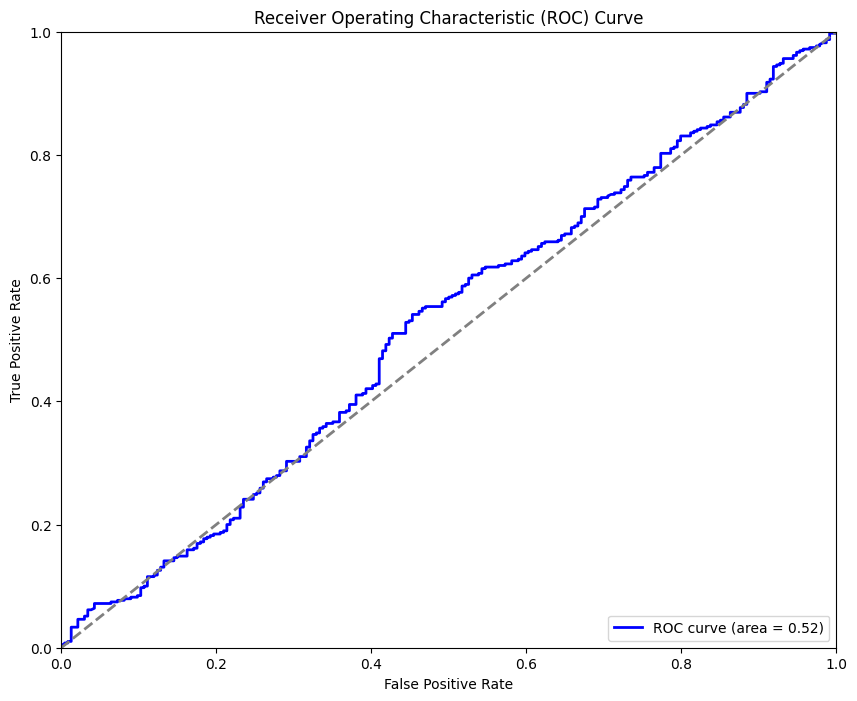

AUC: 0.52


In [ ]:
from sklearn.metrics import roc_curve, auc

# Построение ROC-кривой
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f'AUC: {roc_auc:.2f}')